__CLEANING__

In [4]:
import pandas as pd

In [5]:
# Load the Excel file
file_path = 'Emissions.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [6]:
# 2. Clean 'Vehicle class' column (Column D)
df['Vehicle class'] = df['Vehicle class'].replace({
    'Sport utility vehicle: Small': 'SUV',
    'Sport utility vehicle: Standard': 'SUV',
    'Sport utility vehicle': 'SUV',
    'Station wagon: Small': 'Station wagon',
    'Station wagon: Mid-size': 'Station wagon',
    'Special purpose vehicle': 'SPV',
    'Pickup truck: Small': 'Pickup truck',
    'Pickup truck: Standard': 'Pickup truck'
})


In [7]:
# 3. Clean 'Fuel type' column (Column H)
df['Fuel type'] = df['Fuel type'].replace({
    'X': 'Regular gasoline',
    'Z': 'Premium gasoline',
    'D': 'Diesel',
    'E': 'Ethanol (E85)',
    'N': 'Natural gas'
})

In [8]:
# 4. Add 'Smog rating' based on 'CO2 emissions (g/km)' column
def assign_smog_rating(co2_emission):
    if co2_emission > 500:
        return 1
    elif 450 < co2_emission <= 500:
        return 2
    elif 400 < co2_emission <= 450:
        return 3
    elif 350 < co2_emission <= 400:
        return 4
    elif 300 < co2_emission <= 350:
        return 5
    elif 250 < co2_emission <= 300:
        return 6
    elif 200 < co2_emission <= 250:
        return 7
    elif 150 < co2_emission <= 200:
        return 8
    elif 100 < co2_emission <= 150:
        return 9
    else:
        return 10

df['Smog rating'] = df['CO2 emissions (g/km)'].apply(assign_smog_rating)

In [9]:
# 5. Remove rows with missing values after smog rating is assigned
df_cleaned = df.dropna()

In [10]:
# Show the cleaned data
print(df_cleaned.head())

# Save the cleaned data to a new Excel file
df_cleaned.to_excel('Cleaned_Emissions_Data.xlsx', index=False)

   Model year   Make              Model Vehicle class  Engine size (L)  \
0      2023.0  Acura            Integra     Full-size              1.5   
1      2023.0  Acura     Integra A-SPEC     Full-size              1.5   
2      2023.0  Acura     Integra A-SPEC     Full-size              1.5   
3      2023.0  Acura         MDX SH-AWD           SUV              3.5   
4      2023.0  Acura  MDX SH-AWD Type S           SUV              3.0   

   Cylinders Transmission         Fuel type  City (L/100 km)  \
0        4.0          AV7  Premium gasoline              7.9   
1        4.0          AV7  Premium gasoline              8.1   
2        4.0           M6  Premium gasoline              8.9   
3        6.0         AS10  Premium gasoline             12.6   
4        6.0         AS10  Premium gasoline             13.8   

   Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
0                 6.3                  7.2            39.0   
1                 6.5                  7.4    

__ANALYSIS__

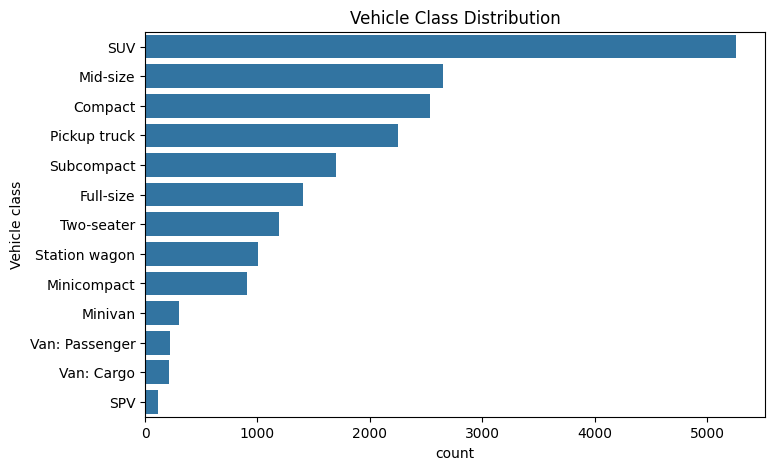

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
# Univariate analysis: Vehicle Class
plt.figure(figsize=(8,5))
sns.countplot(y='Vehicle class', data=df, order=df['Vehicle class'].value_counts().index)
plt.title('Vehicle Class Distribution')
plt.show()

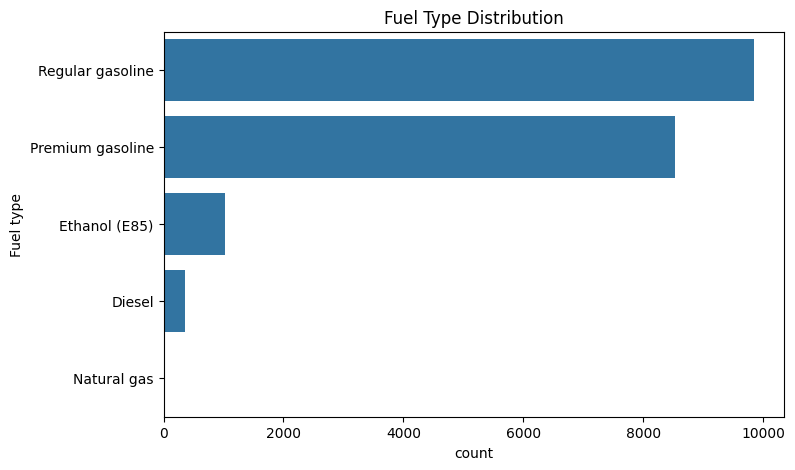

In [12]:
# Univariate analysis: Fuel Type
plt.figure(figsize=(8,5))
sns.countplot(y='Fuel type', data=df, order=df['Fuel type'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.show()

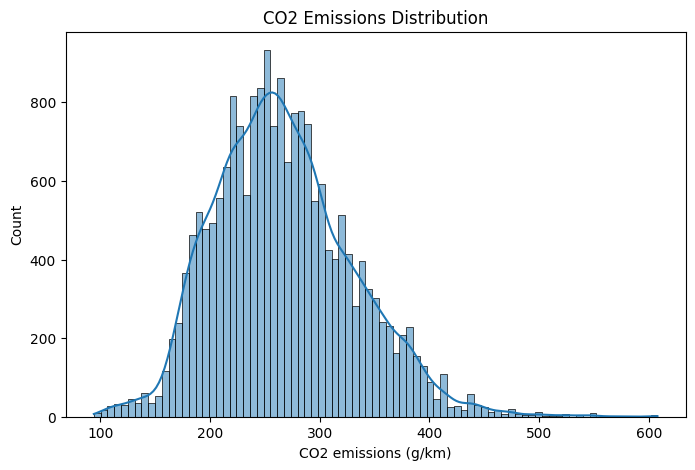

In [13]:
# Univariate analysis: CO2 Emissions
plt.figure(figsize=(8,5))
sns.histplot(df['CO2 emissions (g/km)'], kde=True)
plt.title('CO2 Emissions Distribution')
plt.show()

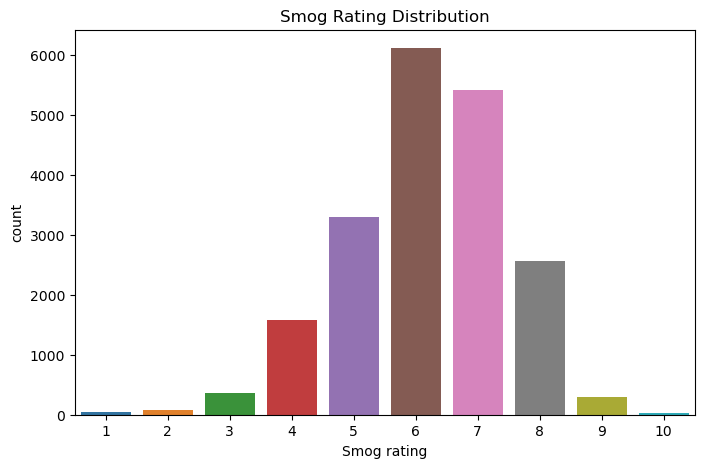

In [56]:
# Univariate analysis: Smog Rating
plt.figure(figsize=(8,5))
sns.countplot(x='Smog rating', data=df)
plt.title('Smog Rating Distribution')
plt.show()

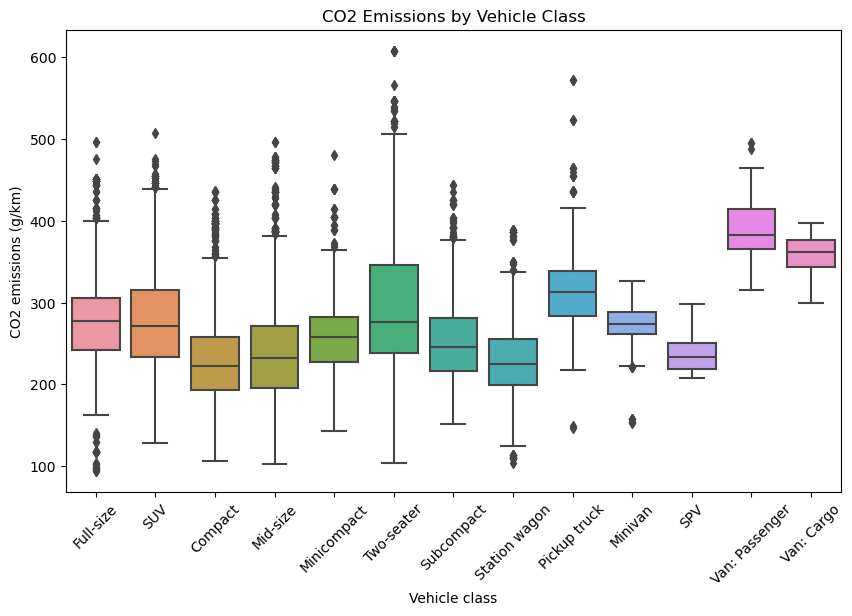

In [57]:
# Bivariate analysis: CO2 Emissions vs. Vehicle Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Vehicle class', y='CO2 emissions (g/km)', data=df)
plt.title('CO2 Emissions by Vehicle Class')
plt.xticks(rotation=45)
plt.show()

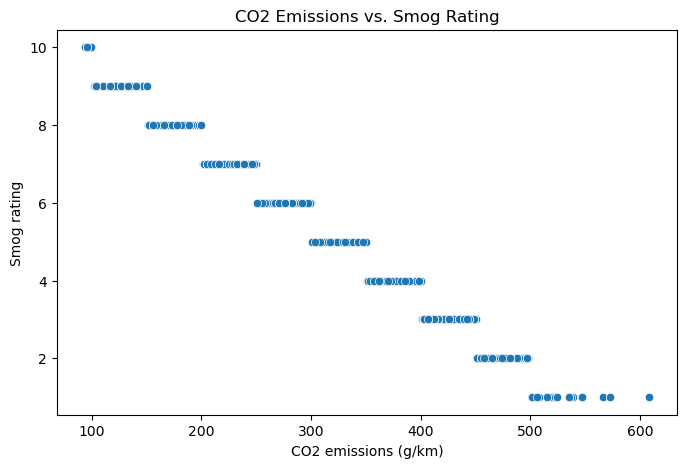

In [58]:
# Bivariate analysis: CO2 Emissions vs. Smog Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='CO2 emissions (g/km)', y='Smog rating', data=df)
plt.title('CO2 Emissions vs. Smog Rating')
plt.show()

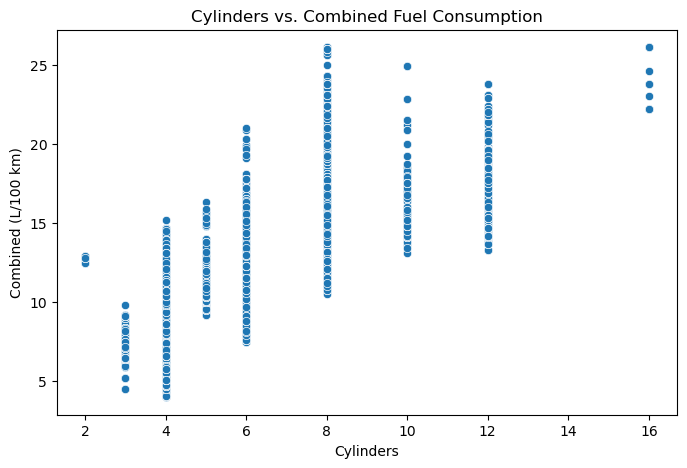

In [59]:
# Bivariate analysis: Cylinders vs. Combined Fuel Consumption
plt.figure(figsize=(8,5))
sns.scatterplot(x='Cylinders', y='Combined (L/100 km)', data=df)
plt.title('Cylinders vs. Combined Fuel Consumption')
plt.show()

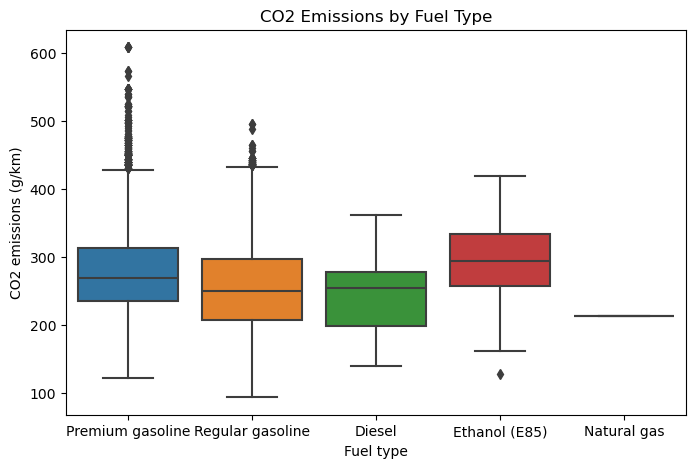

In [60]:
# Bivariate analysis: Fuel Type vs. CO2 Emissions
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel type', y='CO2 emissions (g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.show()

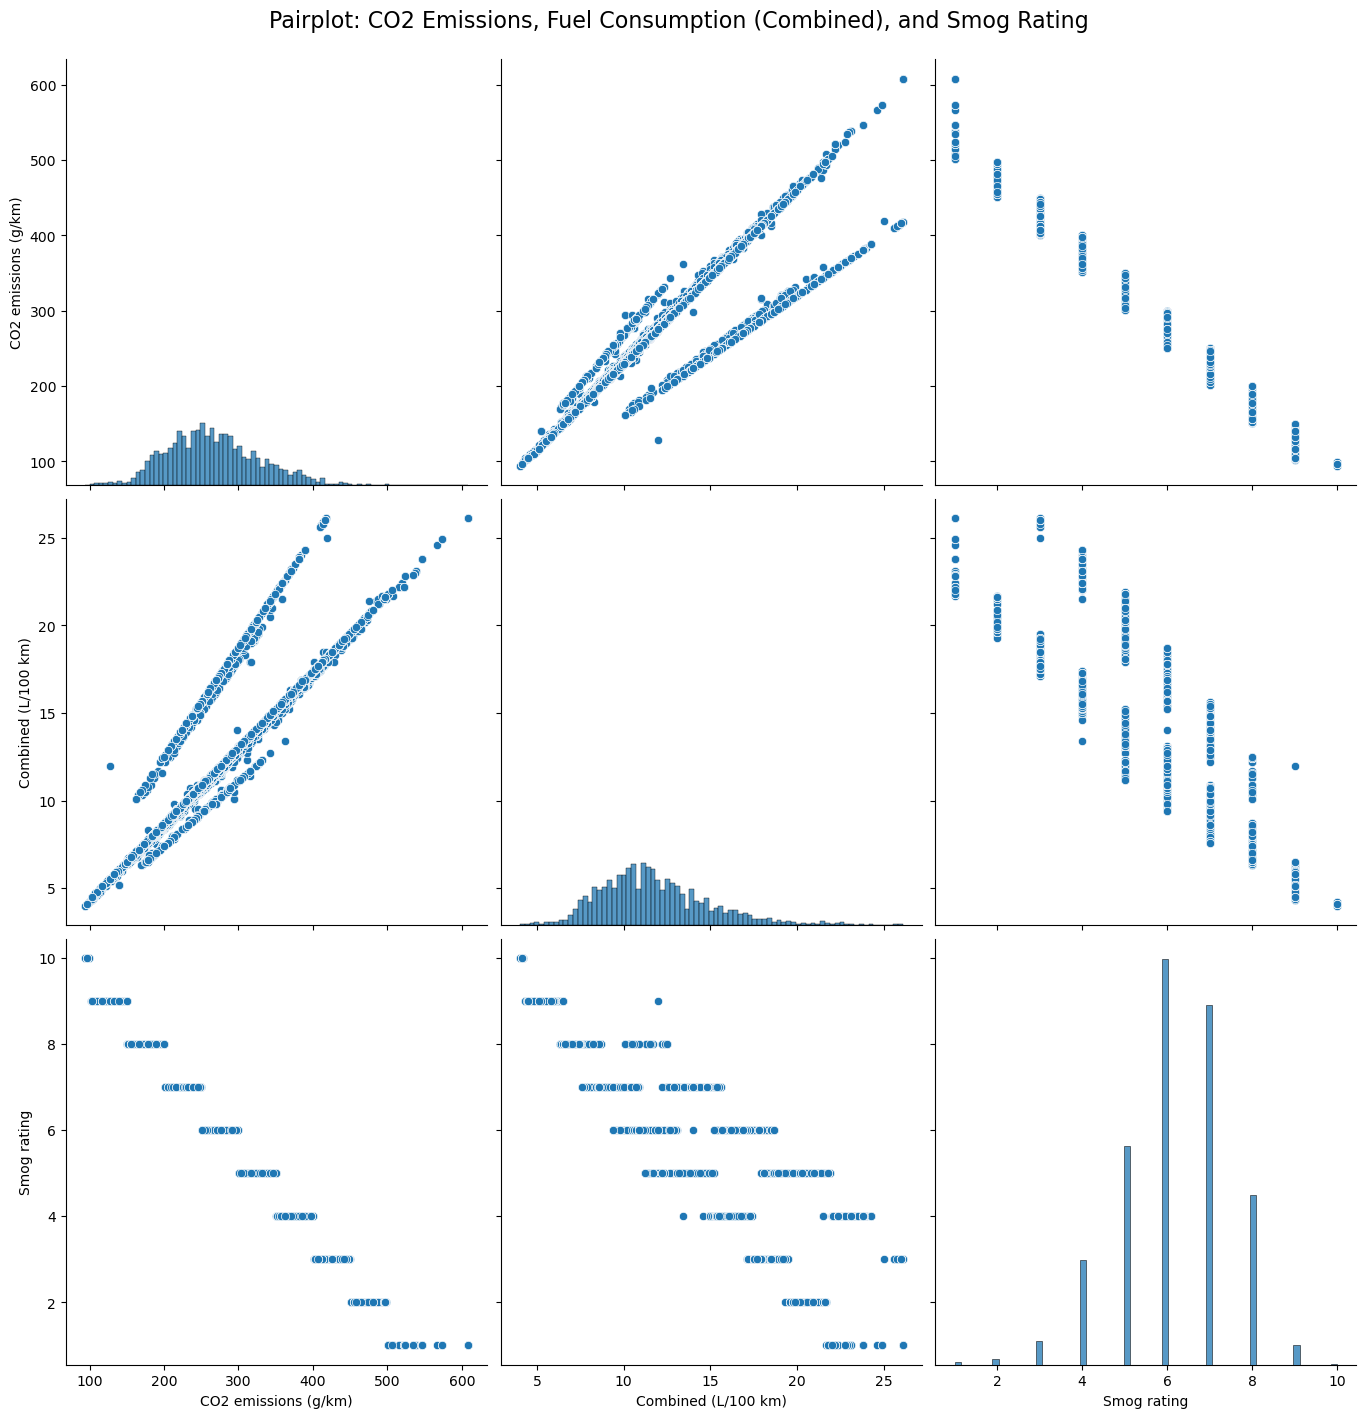

In [61]:
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Replace infinite values with NaN in the relevant columns
df[['CO2 emissions (g/km)', 'Combined (L/100 km)', 'Smog rating']] = df[['CO2 emissions (g/km)', 'Combined (L/100 km)', 'Smog rating']].replace([float('inf'), -float('inf')], pd.NA)

# Drop rows with NaN values in the relevant columns
df_cleaned = df.dropna(subset=['CO2 emissions (g/km)', 'Combined (L/100 km)', 'Smog rating'])

# Multivariate analysis: Pairplot of CO2 Emissions, Fuel Consumption, and Smog Rating
sns.pairplot(df_cleaned[['CO2 emissions (g/km)', 'Combined (L/100 km)', 'Smog rating']], height=4)

# Increase the figure size
plt.gcf().set_size_inches(14, 14)  # Set width and height
plt.suptitle('Pairplot: CO2 Emissions, Fuel Consumption (Combined), and Smog Rating', y=1.02, fontsize=16)
plt.show()


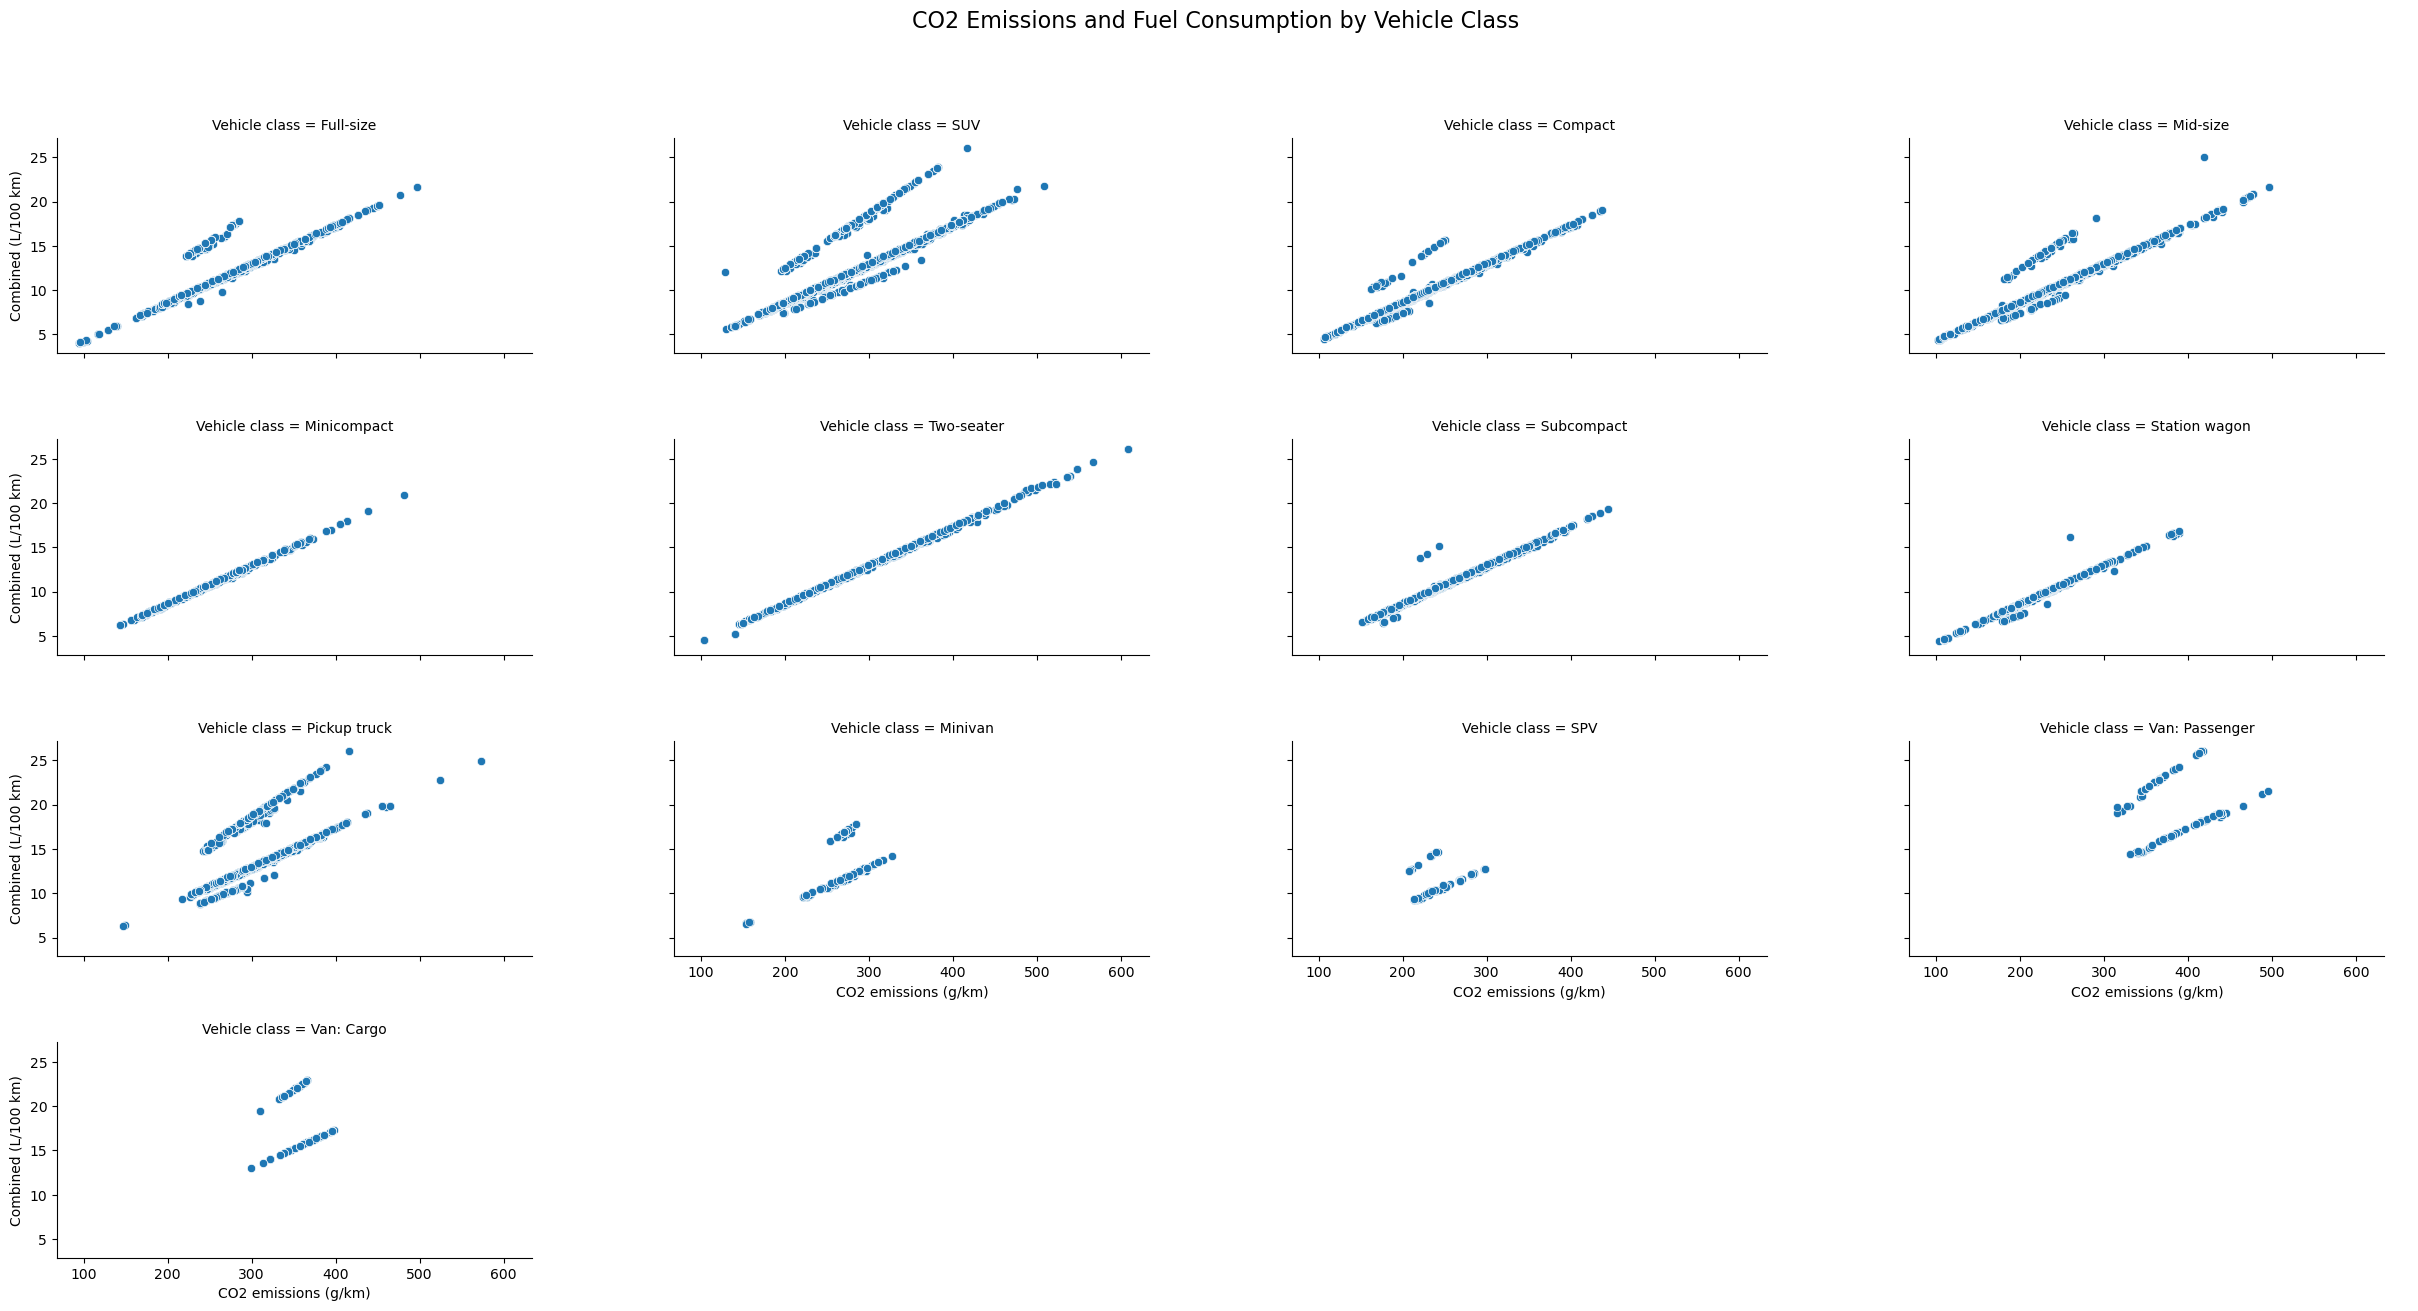

In [66]:
# Multivariate analysis: CO2 Emissions and Fuel Consumption by Vehicle Class
g = sns.FacetGrid(df, col="Vehicle class", height=6, aspect=1.5, col_wrap=4)  # Wrap columns to 4 per row

g.map(sns.scatterplot, "CO2 emissions (g/km)", "Combined (L/100 km)")
g.add_legend()

# Set figure size explicitly to give more room for subplots
g.fig.set_size_inches(24, 16)  # Set larger width and height

# Adjust layout: wspace increases space between plots; hspace increases vertical space
g.fig.subplots_adjust(top=0.9, bottom=0.2, wspace=0.3, hspace=0.4)

# Add title
g.fig.suptitle('CO2 Emissions and Fuel Consumption by Vehicle Class', fontsize=16)

plt.show()

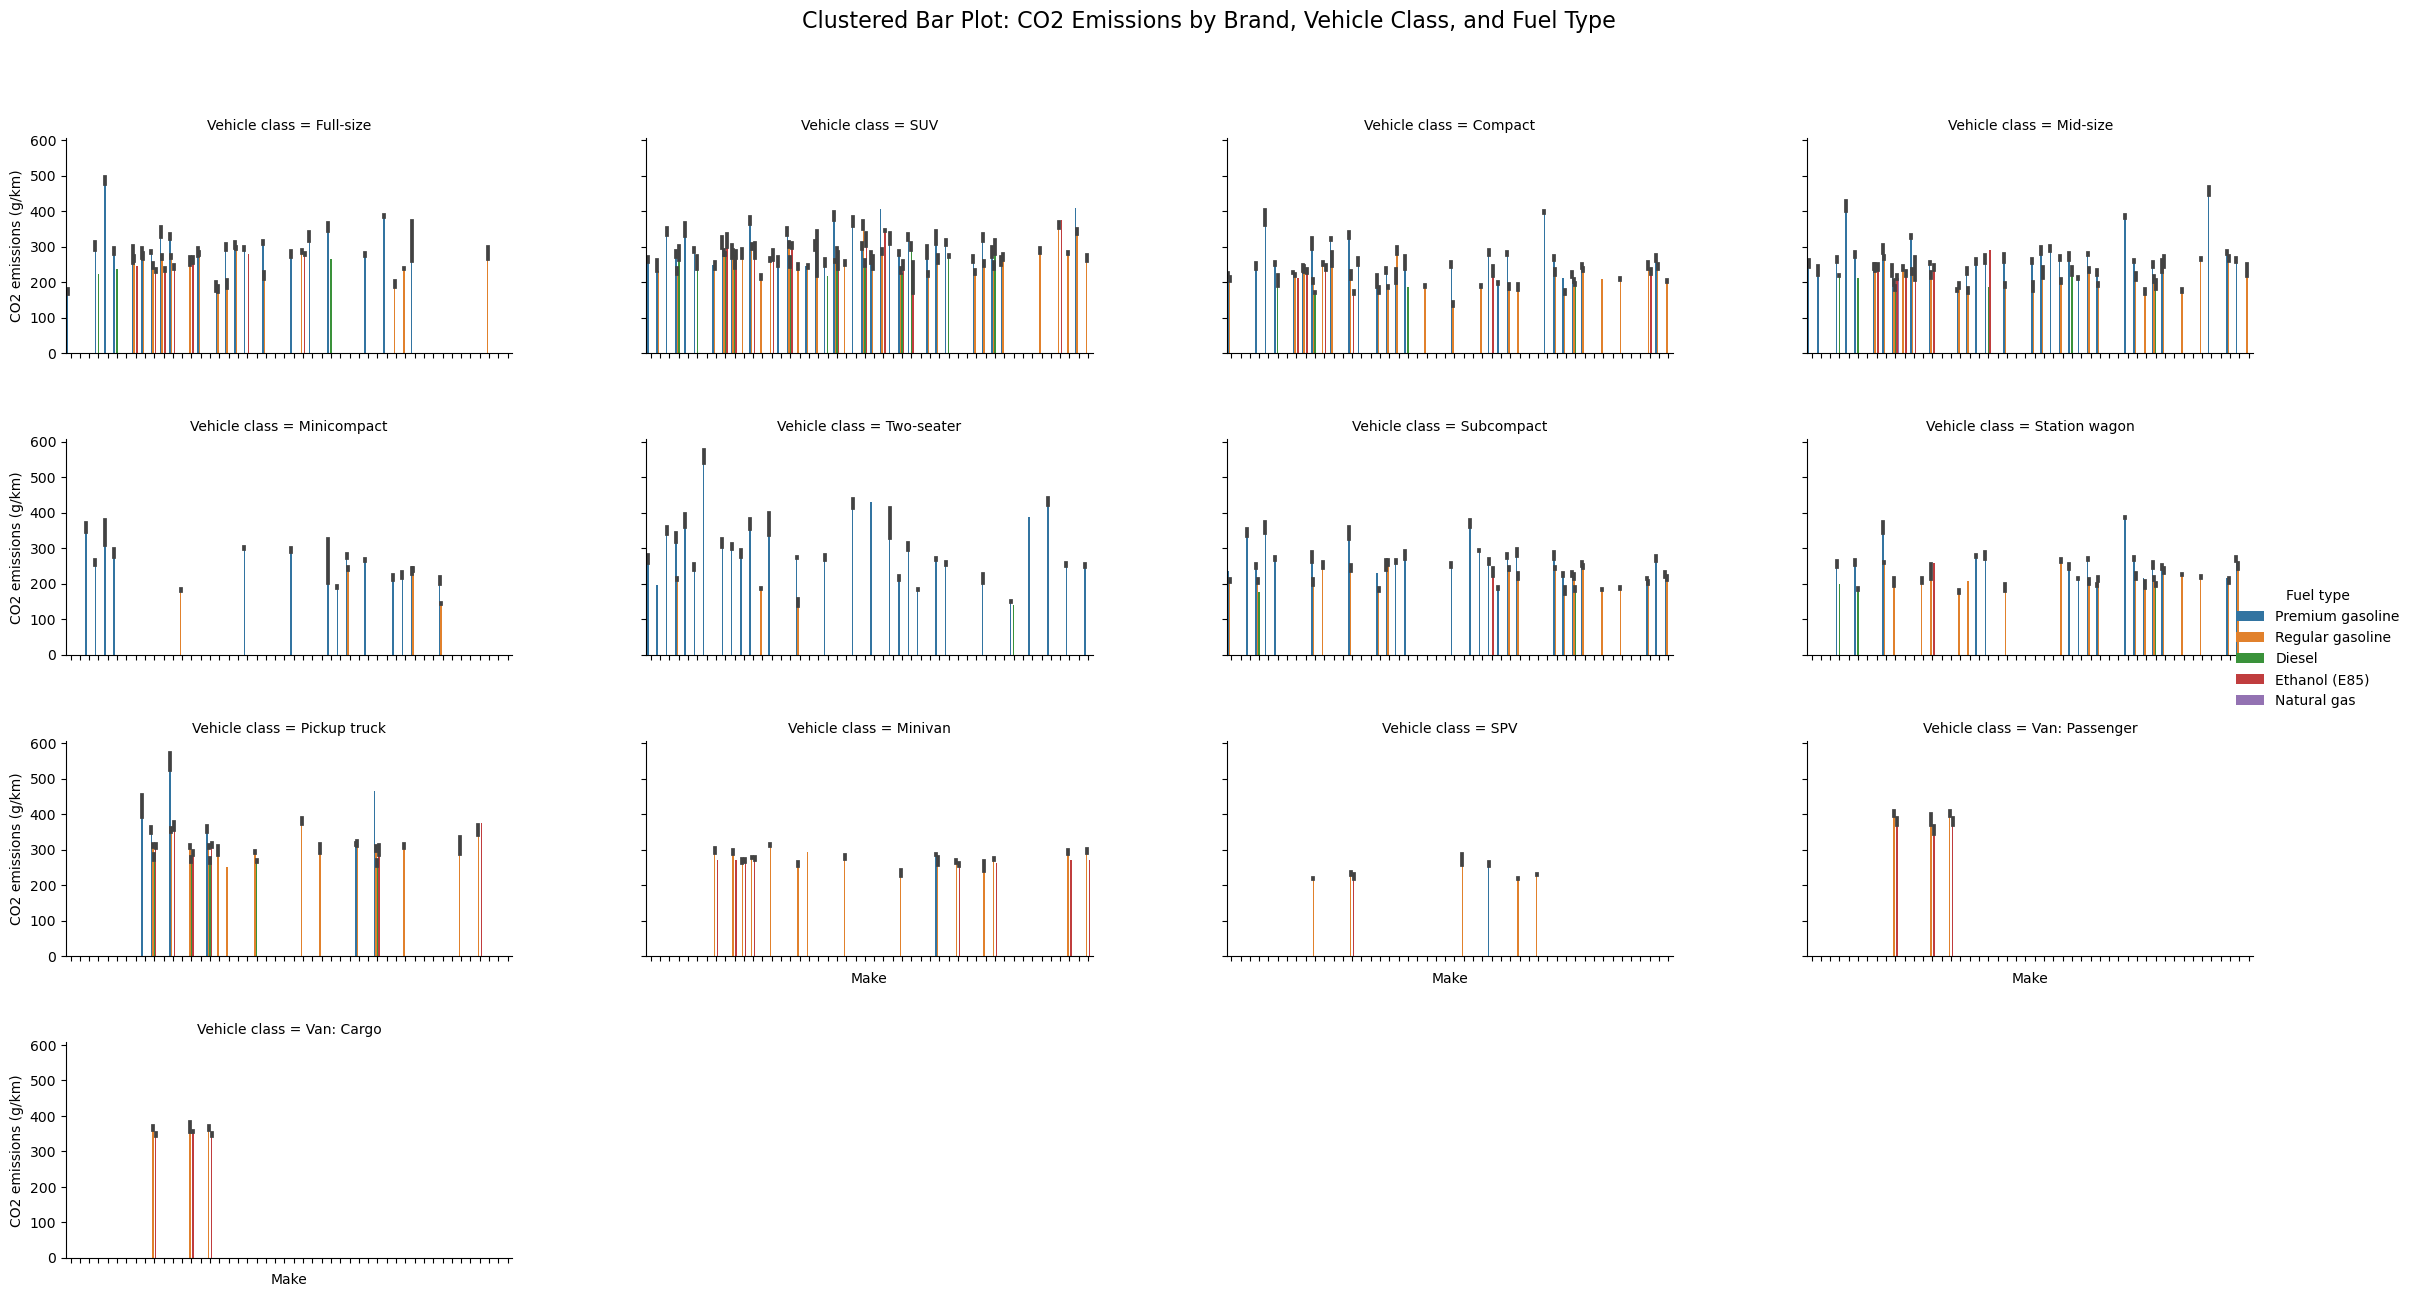

In [67]:
# Multivariate analysis: Clustered bar plot of Brand, Vehicle Class, CO2 Emissions, and Fuel Type
g = sns.catplot(x='Make', y='CO2 emissions (g/km)', hue='Fuel type', col='Vehicle class', 
                kind='bar', data=df, height=5, aspect=1.5, col_wrap=4)  # Wrap columns for better plot distribution

# Set figure size explicitly
g.fig.set_size_inches(24, 16)  # Set larger figure size to accommodate the subplots

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Adjust layout for more space between subplots
g.fig.subplots_adjust(top=0.9, bottom=0.2, wspace=0.3, hspace=0.4)

# Add a title for the entire figure
g.fig.suptitle('Clustered Bar Plot: CO2 Emissions by Brand, Vehicle Class, and Fuel Type', fontsize=16)

plt.show()


In [12]:
import os
import pandas as pd

# Load the data
df = pd.read_excel("Emissions.xlsx")

In [13]:
output_path = r'C:\Users\ishme\Downloads\emissions_data.csv'

In [14]:
df.to_csv(output_path, index=False)